<a href="https://colab.research.google.com/github/andzagz/sc-healthcare-trends/blob/main/beneficiarios_ETL_SARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

file_path = "/content/drive/MyDrive/Colab Notebooks/Case beneficiarios/beneficiarios_municipio_vs_2024-2010.csv"
df = pd.read_csv(file_path, delimiter=';', engine='python', encoding='latin-1', skiprows=4)
print(df)

                          Município   Jun/24   Mar/24   Dez/23   Set/23  \
0              420005 Abdon Batista      472      485      432      415   
1               420010 Abelardo Luz     2063     2090     2093     2097   
2                 420020 Agrolândia      484      491      486      463   
3                 420030 Agronômica      445      448      451      446   
4                  420040 Água Doce     1039     1038     1053     1040   
..                              ...      ...      ...      ...      ...   
292                   421985 Zortéa     1299     1306     1323     1315   
293  420000 Município ignorado - SC       11       12       12       12   
294           421265-Pescaria Brava      321      330      335      262   
295         422000-Balneário Rincão      695      705      646      559   
296                           Total  1680361  1665135  1666591  1659777   

      Jun/23   Mar/23   Dez/22   Set/22   Jun/22  ...   Jun/12   Mar/12  \
0        431      419   

In [ ]:
# prompt: vamos modelar esse df para uma serie temporal, ele precisa ter a coluna Municípios e outra coluna com as datas como categorias no formato (mmaaaa), porem as datas estao distribuidas em colunas

df = df.melt(id_vars=['Município'], var_name='Data', value_name='Beneficiarios')
df['Data'] = df['Data'].str.replace('\/', '')
print(df)


                            Município    Data  Beneficiarios
0                420005 Abdon Batista  Jun/24            472
1                 420010 Abelardo Luz  Jun/24           2063
2                   420020 Agrolândia  Jun/24            484
3                   420030 Agronômica  Jun/24            445
4                    420040 Água Doce  Jun/24           1039
...                               ...     ...            ...
16924                   421985 Zortéa  Mar/10           2644
16925  420000 Município ignorado - SC  Mar/10           3140
16926           421265-Pescaria Brava  Mar/10              0
16927         422000-Balneário Rincão  Mar/10              0
16928                           Total  Mar/10        1417828

[16929 rows x 3 columns]


In [ ]:
import pandas as pd

# Dicionário para traduzir os meses do português para o inglês
month_translation = {
    'Jan': 'Jan', 'Fev': 'Feb', 'Mar': 'Mar', 'Abr': 'Apr',
    'Mai': 'May', 'Jun': 'Jun', 'Jul': 'Jul', 'Ago': 'Aug',
    'Set': 'Sep', 'Out': 'Oct', 'Nov': 'Nov', 'Dez': 'Dec'
}

# Substituindo os nomes dos meses
df['Data'] = df['Data'].replace(month_translation, regex=True)

# Convertendo para datetime
df['Data'] = pd.to_datetime(df['Data'], format='%b/%y')

# Exibindo o DataFrame para verificar o resultado
print(df)


                            Município       Data  Beneficiarios
0                420005 Abdon Batista 2024-06-01            472
1                 420010 Abelardo Luz 2024-06-01           2063
2                   420020 Agrolândia 2024-06-01            484
3                   420030 Agronômica 2024-06-01            445
4                    420040 Água Doce 2024-06-01           1039
...                               ...        ...            ...
16924                   421985 Zortéa 2010-03-01           2644
16925  420000 Município ignorado - SC 2010-03-01           3140
16926           421265-Pescaria Brava 2010-03-01              0
16927         422000-Balneário Rincão 2010-03-01              0
16928                           Total 2010-03-01        1417828

[16929 rows x 3 columns]


In [ ]:
# prompt: exclua a linha "Total"

df = df[df['Município'] != 'Total']
print(df)


                            Município       Data  Beneficiarios
0                420005 Abdon Batista 2024-06-01            472
1                 420010 Abelardo Luz 2024-06-01           2063
2                   420020 Agrolândia 2024-06-01            484
3                   420030 Agronômica 2024-06-01            445
4                    420040 Água Doce 2024-06-01           1039
...                               ...        ...            ...
16923                    421970 Xaxim 2010-03-01           1356
16924                   421985 Zortéa 2010-03-01           2644
16925  420000 Município ignorado - SC 2010-03-01           3140
16926           421265-Pescaria Brava 2010-03-01              0
16927         422000-Balneário Rincão 2010-03-01              0

[16872 rows x 3 columns]


In [ ]:
# prompt: transforme a primeira coluna em duas, a primeira se chamara id-municipio e a segunda Municípios. na primeira, os valores serão os 6 primeiros numeros da coluna ogirinal. na segunda, os valores serão os caracteres a partir dos 7 primeiros caracteres da coluna original

df[['id-municipio','Municípios']] = df['Município'].str.extract(r'(\d{6})(.*)')
print(df)


                            Município       Data  Beneficiarios id-municipio  \
0                420005 Abdon Batista 2024-06-01            472       420005   
1                 420010 Abelardo Luz 2024-06-01           2063       420010   
2                   420020 Agrolândia 2024-06-01            484       420020   
3                   420030 Agronômica 2024-06-01            445       420030   
4                    420040 Água Doce 2024-06-01           1039       420040   
...                               ...        ...            ...          ...   
16923                    421970 Xaxim 2010-03-01           1356       421970   
16924                   421985 Zortéa 2010-03-01           2644       421985   
16925  420000 Município ignorado - SC 2010-03-01           3140       420000   
16926           421265-Pescaria Brava 2010-03-01              0       421265   
16927         422000-Balneário Rincão 2010-03-01              0       422000   

                     Municípios  
0    

In [ ]:
# prompt: tire a primeira coluna

df = df.drop(columns=df.columns[0])
print(df)


            Data  Beneficiarios id-municipio                Municípios
0     2024-06-01            472       420005             Abdon Batista
1     2024-06-01           2063       420010              Abelardo Luz
2     2024-06-01            484       420020                Agrolândia
3     2024-06-01            445       420030                Agronômica
4     2024-06-01           1039       420040                 Água Doce
...          ...            ...          ...                       ...
16923 2010-03-01           1356       421970                     Xaxim
16924 2010-03-01           2644       421985                    Zortéa
16925 2010-03-01           3140       420000   Município ignorado - SC
16926 2010-03-01              0       421265           -Pescaria Brava
16927 2010-03-01              0       422000         -Balneário Rincão

[16872 rows x 4 columns]


In [ ]:
# prompt: me deixe ver os valores distindos da coluna 4

print(df.iloc[:, 3].unique())


[' Abdon Batista' ' Abelardo Luz' ' Agrolândia' ' Agronômica' ' Água Doce'
 ' Águas de Chapecó' ' Águas Frias' ' Águas Mornas' ' Alfredo Wagner'
 ' Alto Bela Vista' ' Anchieta' ' Angelina' ' Anita Garibaldi'
 ' Anitápolis' ' Antônio Carlos' ' Apiúna' ' Arabutã' ' Araquari'
 ' Araranguá' ' Armazém' ' Arroio Trinta' ' Arvoredo' ' Ascurra'
 ' Atalanta' ' Aurora' ' Balneário Arroio do Silva'
 ' Balneário Barra do Sul' ' Balneário Camboriú' ' Balneário Gaivota'
 ' Balneário Piçarras' ' Bandeirante' ' Barra Bonita' ' Barra Velha'
 ' Bela Vista do Toldo' ' Belmonte' ' Benedito Novo' ' Biguaçu'
 ' Blumenau' ' Bocaina do Sul' ' Bom Jardim da Serra' ' Bom Jesus'
 ' Bom Jesus do Oeste' ' Bom Retiro' ' Bombinhas' ' Botuverá'
 ' Braço do Norte' ' Braço do Trombudo' ' Brunópolis' ' Brusque'
 ' Caçador' ' Caibi' ' Calmon' ' Camboriú' ' Campo Alegre'
 ' Campo Belo do Sul' ' Campo Erê' ' Campos Novos' ' Canelinha'
 ' Canoinhas' ' Capão Alto' ' Capinzal' ' Capivari de Baixo' ' Catanduvas'
 ' Caxambu do 

In [ ]:
# prompt: substitua as linhas '-Pescaria Brava' e '-Balneário Rincão' por 'Pescaria Brava' e 'Balneário Rincão', respectivamente. em seguida retire as linhas referentes ao valor ' Município ignorado - SC'
# mostre o resultado

df['Municípios'] = df['Municípios'].str.replace('-Pescaria Brava', 'Pescaria Brava')
df['Municípios'] = df['Municípios'].str.replace('-Balneário Rincão', 'Balneário Rincão')

df = df[df['Municípios'] != ' Município ignorado - SC']

print(df)


            Data  Beneficiarios id-municipio        Municípios
0     2024-06-01            472       420005     Abdon Batista
1     2024-06-01           2063       420010      Abelardo Luz
2     2024-06-01            484       420020        Agrolândia
3     2024-06-01            445       420030        Agronômica
4     2024-06-01           1039       420040         Água Doce
...          ...            ...          ...               ...
16922 2010-03-01            176       421960         Xavantina
16923 2010-03-01           1356       421970             Xaxim
16924 2010-03-01           2644       421985            Zortéa
16926 2010-03-01              0       421265    Pescaria Brava
16927 2010-03-01              0       422000  Balneário Rincão

[16815 rows x 4 columns]


Data
2010-03-01    1414688
2010-06-01    1440419
2010-09-01    1455883
2010-12-01    1478268
2011-03-01    1500230
2011-06-01    1505933
2011-09-01    1502644
2011-12-01    1522502
2012-03-01    1362703
2012-06-01    1381627
2012-09-01    1392839
2012-12-01    1406309
2013-03-01    1375124
2013-06-01    1396978
2013-09-01    1424599
2013-12-01    1440506
2014-03-01    1467496
2014-09-01    1509979
2014-12-01    1520165
2015-03-01    1525598
2015-06-01    3065370
2015-09-01    1520449
2015-12-01    1515499
2016-03-01    1466988
2016-06-01    1485164
2016-09-01    1486209
2016-12-01    1488573
2017-03-01    1484912
2017-06-01    1488172
2017-09-01    1493664
2017-12-01    1504839
2018-03-01    1492904
2018-06-01    1501111
2018-09-01    1506029
2018-12-01    1505341
2019-03-01    1477748
2019-06-01    1503821
2019-09-01    1485755
2019-12-01    1471797
2020-03-01    1469759
2020-06-01    1457262
2020-09-01    1462295
2020-12-01    1495296
2021-03-01    1497018
2021-06-01    1515111
2021-

<Axes: xlabel='Data'>

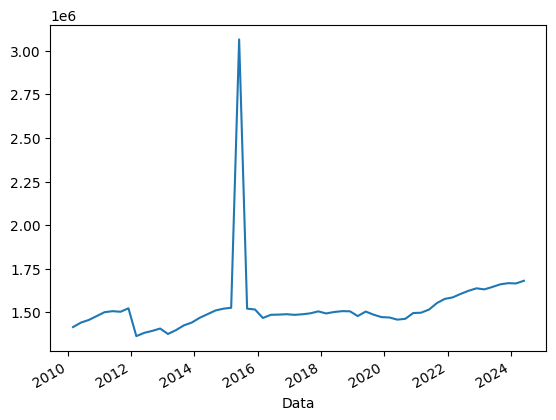

In [ ]:
# prompt: agora faça um novo df com os valores de beneficiarios somados para todos os municipios, ou seja, um novo df com a data e total de beneficiarios
# plote um grafico de linhas também

df_total = df.groupby('Data')['Beneficiarios'].sum()
print(df_total)

df_total.plot(x='Data', y='Beneficiarios', kind='line')


Data
2021-03-01    1497018
2021-06-01    1515111
2021-09-01    1552687
2021-12-01    1576558
2022-03-01    1584914
2022-06-01    1605036
2022-09-01    1622915
2022-12-01    1637070
2023-03-01    1630988
2023-06-01    1644587
2023-09-01    1659765
2023-12-01    1666579
2024-03-01    1665123
2024-06-01    1680350
Name: Beneficiarios, dtype: int64


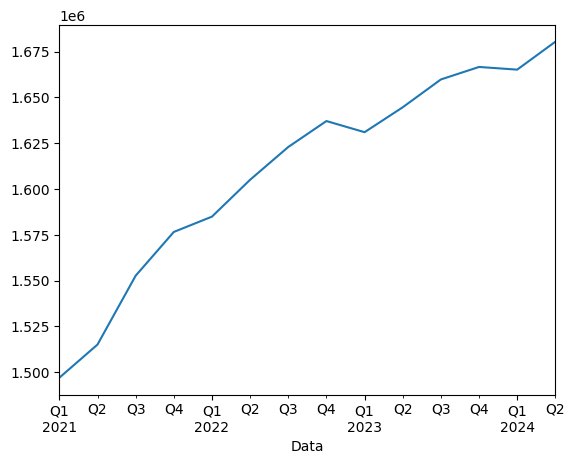

In [ ]:
# prompt: considere apenas os dados a partir de 2016 no eixo x e indexe como meu eixo de data

# Filtrar dados a partir de 2016
df_2016 = df[df['Data'].dt.year >= 2021]

# Definir a coluna 'Data' como índice
df_2016 = df_2016.set_index('Data')

# Plotar o gráfico
df_total = df_2016.groupby('Data')['Beneficiarios'].sum()
df_total.plot(x='Data', y='Beneficiarios', kind='line')
print(df_total)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Definir o último dia do mês para cada trimestre
df_total.index = df_total.index.to_period('Q').to_timestamp(how='E')

# Exibir o DataFrame com a frequência trimestral
print(df_total)


Data
2021-03-31 23:59:59.999999999    1497018
2021-06-30 23:59:59.999999999    1515111
2021-09-30 23:59:59.999999999    1552687
2021-12-31 23:59:59.999999999    1576558
2022-03-31 23:59:59.999999999    1584914
2022-06-30 23:59:59.999999999    1605036
2022-09-30 23:59:59.999999999    1622915
2022-12-31 23:59:59.999999999    1637070
2023-03-31 23:59:59.999999999    1630988
2023-06-30 23:59:59.999999999    1644587
2023-09-30 23:59:59.999999999    1659765
2023-12-31 23:59:59.999999999    1666579
2024-03-31 23:59:59.999999999    1665123
2024-06-30 23:59:59.999999999    1680350
Name: Beneficiarios, dtype: int64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


MSE: 369620772780.4577
RMSE: 607964.4502604224
MAE: 498660.9161695419
MAPE: 29.811942487190635
R²: -7851.72647119462


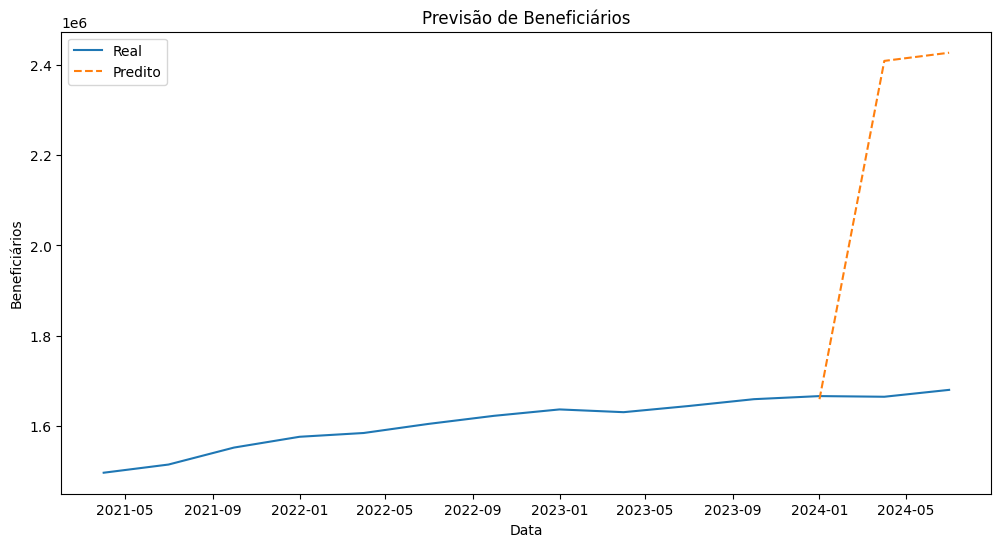

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Dividindo os dados em 80% treino e 20% teste, mantendo a ordem temporal
train_size = int(len(df_total) * 0.8)
train_data = df_total.iloc[:train_size]
test_data = df_total.iloc[train_size:]

# Treinando o modelo SARIMA
model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Fazendo previsões a partir de 2024
# Certifique-se de que o índice da previsão corresponde ao intervalo do teste
predictions = model_fit.predict(start=test_data.index[0], end=df_total.index[-1])

# Avaliando o modelo
mse = mean_squared_error(test_data, predictions.loc[test_data.index])
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data, predictions.loc[test_data.index])

# Calculando o MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape = mean_absolute_percentage_error(test_data, predictions.loc[test_data.index])

# Calculando o R²
r2 = r2_score(test_data, predictions.loc[test_data.index])

# Imprimindo as métricas
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')
print(f'R²: {r2}')

# Plotando o gráfico
plt.figure(figsize=(12, 6))
plt.plot(df_total.index, df_total, label='Real')
plt.plot(predictions.index, predictions, label='Predito', linestyle='--')
plt.legend()
plt.title('Previsão de Beneficiários')
plt.xlabel('Data')
plt.ylabel('Beneficiários')
plt.show()


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.8 MB/s eta 0:00:00


In [ ]:
import optuna
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Função de objetivo para otimização com Optuna
def objective(trial):
    try:
        # Sugerindo valores para os hiperparâmetros SARIMA
        p = trial.suggest_int('p', 0, 3)
        d = trial.suggest_int('d', 0, 2)
        q = trial.suggest_int('q', 0, 3)
        P = trial.suggest_int('P', 0, 3)
        D = trial.suggest_int('D', 0, 2)
        Q = trial.suggest_int('Q', 0, 3)
        s = trial.suggest_int('s', 1, 12)  # Mudando o mínimo para 1 para evitar problemas de sazonalidade zero

        # Treinando o modelo SARIMA
        model = SARIMAX(train_data,
                        order=(p, d, q),
                        seasonal_order=(P, D, Q, s))
        model_fit = model.fit(disp=False)

        # Fazendo previsões no conjunto de teste
        predictions = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])

        # Calculando o erro MSE como métrica de avaliação
        mse = mean_squared_error(test_data, predictions.loc[test_data.index])

        return mse
    except Exception as e:
        print(f'Error in trial: {e}')
        return float('inf')  # Retorna um valor alto se ocorrer um erro

# Criando o estudo de otimização
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)  # Definindo o número de tentativas (trials)

# Melhor combinação de parâmetros
print('Best Parameters:', study.best_params)
print('Best MSE:', study.best_value)

# Treinando o modelo com os melhores parâmetros encontrados
best_params = study.best_params
best_model = SARIMAX(train_data,
                     order=(best_params['p'], best_params['d'], best_params['q']),
                     seasonal_order=(best_params['P'], best_params['D'], best_params['Q'], best_params['s']))
best_model_fit = best_model.fit()

# Fazendo previsões com o melhor modelo
predictions_best = best_model_fit.predict(start=test_data.index[0], end=test_data.index[-1])

# Avaliando o modelo final
mse_best = mean_squared_error(test_data, predictions_best.loc[test_data.index])
print(f'Best Model MSE: {mse_best}')


[I 2024-09-16 23:56:32,082] A new study created in memory with name: no-name-af4289b2-b39e-41ce-9f27-e28ff3cafeb5
[I 2024-09-16 23:56:32,091] Trial 0 finished with value: inf and parameters: {'p': 3, 'd': 1, 'q': 2, 'P': 1, 'D': 1, 'Q': 1, 's': 3}. Best is trial 0 with value: inf.
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
[I 2024-09-16 23:56:32,109] Trial 1 finished with value: inf and parameters: {'p': 0, 'd': 0, 'q': 3, 'P': 2, 'D': 2, 'Q': 3, 's': 5}. Best is trial 0 with value: inf.
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inf

Error in trial: Invalid model: autoregressive lag(s) {3} are in both the seasonal and non-seasonal autoregressive components.
Error in trial: too many indices for array: array is 0-dimensional, but 1 were indexed


[I 2024-09-16 23:56:32,400] Trial 2 finished with value: 375025893123.6113 and parameters: {'p': 1, 'd': 0, 'q': 1, 'P': 3, 'D': 2, 'Q': 1, 's': 11}. Best is trial 2 with value: 375025893123.6113.
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too

Error in trial: Seasonal periodicity must be greater than 1.


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
[I 2024-09-16 23:57:05,369] Trial 14 finished with value: 71568053.5750638 and parameters: {'p': 3, 'd': 0, 'q': 0, 'P': 0, 'D': 0, 'Q': 0, 's': 8}. Best is trial 6 with value: 50214366.22378103.
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
[I 2024-09-16 23:57:06,431] Trial 15 finished with value: 143600438.62932894 and parameters: {'p': 3, 'd': 1, 'q': 0, 'P': 0, 'D': 0, 'Q': 0, 's': 8}. Best is trial 6 wit

Error in trial: too many indices for array: array is 0-dimensional, but 1 were indexed


[I 2024-09-16 23:57:13,358] Trial 21 finished with value: 46373922.04159997 and parameters: {'p': 3, 'd': 1, 'q': 2, 'P': 0, 'D': 1, 'Q': 1, 's': 3}. Best is trial 19 with value: 17667832.704398517.
[I 2024-09-16 23:57:13,428] Trial 22 finished with value: inf and parameters: {'p': 3, 'd': 1, 'q': 2, 'P': 1, 'D': 1, 'Q': 1, 's': 2}. Best is trial 19 with value: 17667832.704398517.
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances

Error in trial: Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.


[I 2024-09-16 23:57:13,748] Trial 23 finished with value: 15066790.896401776 and parameters: {'p': 3, 'd': 1, 'q': 2, 'P': 0, 'D': 1, 'Q': 1, 's': 4}. Best is trial 23 with value: 15066790.896401776.
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
[I 2024-09-16 23:57:14,193] Trial 24 finished with value: 15027021.112333357 and parameters: {'p

Error in trial: Seasonal periodicity must be greater than 1.
Error in trial: Invalid model: autoregressive lag(s) {3} are in both the seasonal and non-seasonal autoregressive components.


[I 2024-09-16 23:57:16,236] Trial 29 finished with value: 12714767.306710785 and parameters: {'p': 3, 'd': 2, 'q': 2, 'P': 1, 'D': 1, 'Q': 0, 's': 4}. Best is trial 29 with value: 12714767.306710785.
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check ml

Error in trial: Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
[I 2024-09-16 23:57:18,449] Trial 36 finished with value: 649622561.166107

Error in trial: Invalid model: autoregressive lag(s) {3} are in both the seasonal and non-seasonal autoregressive components.


[I 2024-09-16 23:57:19,491] Trial 41 finished with value: 15066790.896401776 and parameters: {'p': 3, 'd': 1, 'q': 2, 'P': 0, 'D': 1, 'Q': 1, 's': 4}. Best is trial 29 with value: 12714767.306710785.
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
[I 2024-09-16 23:57:19,927] Trial 42 finished with value: 15027021.112333357 and parameters: {'p

Error in trial: Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.


[I 2024-09-16 23:57:21,251] Trial 46 finished with value: 260229632.38398078 and parameters: {'p': 3, 'd': 1, 'q': 2, 'P': 1, 'D': 1, 'Q': 0, 's': 5}. Best is trial 29 with value: 12714767.306710785.
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: 

Error in trial: Invalid model: autoregressive lag(s) {3} are in both the seasonal and non-seasonal autoregressive components.


[I 2024-09-16 23:57:23,978] Trial 49 finished with value: 50377626463.91428 and parameters: {'p': 2, 'd': 2, 'q': 2, 'P': 3, 'D': 1, 'Q': 0, 's': 6}. Best is trial 29 with value: 12714767.306710785.
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Best Parameters: {'p': 3, 'd': 2, 'q': 2, 'P': 1, 'D': 1, 'Q': 0, 's': 4}
Best MSE: 12714767.306710785
Best Model MSE: 12714767.306710785


In [ ]:
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # Importando o r2_score
import matplotlib.pyplot as plt
import numpy as np

# Definindo a frequência trimestral e ajustando as datas para o último dia de cada trimestre
df_total.index = df_total.index.to_period('Q').to_timestamp(how='end')

# Definindo a frequência trimestral (agora que o índice está ajustado para o final de cada trimestre)
df_total = df_total.asfreq('Q')

# Exibindo o DataFrame atualizado
print(df_total)

Data
2021-03-31 23:59:59.999999999    1497018
2021-06-30 23:59:59.999999999    1515111
2021-09-30 23:59:59.999999999    1552687
2021-12-31 23:59:59.999999999    1576558
2022-03-31 23:59:59.999999999    1584914
2022-06-30 23:59:59.999999999    1605036
2022-09-30 23:59:59.999999999    1622915
2022-12-31 23:59:59.999999999    1637070
2023-03-31 23:59:59.999999999    1630988
2023-06-30 23:59:59.999999999    1644587
2023-09-30 23:59:59.999999999    1659765
2023-12-31 23:59:59.999999999    1666579
2024-03-31 23:59:59.999999999    1665123
2024-06-30 23:59:59.999999999    1680350
Freq: Q-DEC, Name: Beneficiarios, dtype: int64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


MSE: 8326412.15417292
RMSE: 2885.5523135394583
MAE: 2440.328892914656
MAPE: 0.14586221082019668
R²: 0.8231023742488985


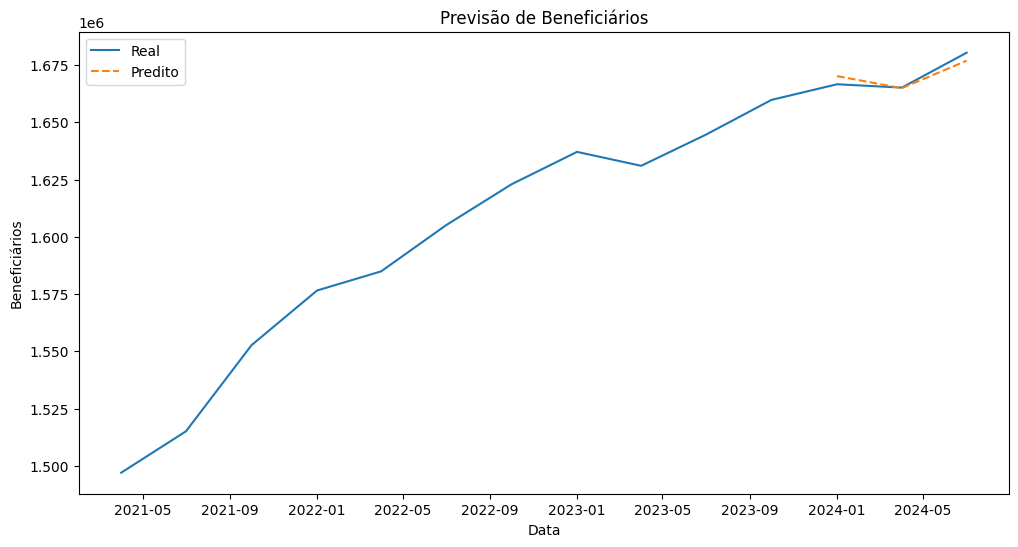

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Dividindo os dados em 80% treino e 20% teste, mantendo a ordem temporal
train_size = int(len(df_total) * 0.8)
train_data = df_total.iloc[:train_size]
test_data = df_total.iloc[train_size:]


# Assumindo que os melhores parâmetros estão em 'best_params'
#best_params = {'p': 2, 'd': 1, 'q': 3, 'P': 1, 'D': 0, 'Q': 2, 's': 12}  # Exemplo de valores, substituir pelos reais
best_params = {'p': 1, 'd': 0, 'q': 1, 'P': 3, 'D': 0, 'Q': 0, 's': 4}

# Passando os parâmetros otimizados para o modelo SARIMA
model = SARIMAX(train_data,
                order=(best_params['p'], best_params['d'], best_params['q']),
                seasonal_order=(best_params['P'], best_params['D'], best_params['Q'], best_params['s']))


# Treinando o modelo SARIMA
#model = SARIMAX(train_data, order=(2, 1, 3), seasonal_order=(1, 0, 2, 12))
model_fit = model.fit()
#Best Parameters: {'p': 2, 'd': 1, 'q': 3, 'P': 1, 'D': 0, 'Q': 2, 's': 12}

# Fazendo previsões a partir de 2024
# Certifique-se de que o índice da previsão corresponde ao intervalo do teste
predictions = model_fit.predict(start=test_data.index[0], end=df_total.index[-1])

# Avaliando o modelo
mse = mean_squared_error(test_data, predictions.loc[test_data.index])
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data, predictions.loc[test_data.index])

# Calculando o MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape = mean_absolute_percentage_error(test_data, predictions.loc[test_data.index])

# Calculando o R²
r2 = r2_score(test_data, predictions.loc[test_data.index])

# Imprimindo as métricas
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')
print(f'R²: {r2}')

# Plotando o gráfico
plt.figure(figsize=(12, 6))
plt.plot(df_total.index, df_total, label='Real')
plt.plot(predictions.index, predictions, label='Predito', linestyle='--')
plt.legend()
plt.title('Previsão de Beneficiários')
plt.xlabel('Data')
plt.ylabel('Beneficiários')
plt.show()


In [ ]:
import pandas as pd

# Ajuste o período de previsão
forecast_dates = pd.date_range(start='2023-06-30', end='2025-12-31', freq='M')

# Faça previsões para o período correto
forecast = best_model_fit.get_forecast(steps=len(forecast_dates))
forecast_mean = forecast.predicted_mean

# Verifique se a previsão cobre o período desejado
print("Comprimento do Período de Previsão:", len(forecast_dates))
print("Comprimento das Previsões:", len(forecast_mean))

# Criando o DataFrame para previsões
forecast_df = pd.DataFrame(data=forecast_mean.values, index=forecast_dates, columns=['Predito'])

# Exibindo as previsões
print(forecast_df)


Comprimento do Período de Previsão: 31
Comprimento das Previsões: 31
                 Predito
2023-06-30  1.672556e+06
2023-07-31  1.665594e+06
2023-08-31  1.678869e+06
2023-09-30  1.693968e+06
2023-10-31  1.706894e+06
2023-11-30  1.700172e+06
2023-12-31  1.713772e+06
2024-01-31  1.729243e+06
2024-02-29  1.742576e+06
2024-03-31  1.736280e+06
2024-04-30  1.750322e+06
2024-05-31  1.766242e+06
2024-06-30  1.780030e+06
2024-07-31  1.774193e+06
2024-08-31  1.788696e+06
2024-09-30  1.805079e+06
2024-10-31  1.819332e+06
2024-11-30  1.813959e+06
2024-12-31  1.828927e+06
2025-01-31  1.845776e+06
2025-02-28  1.860494e+06
2025-03-31  1.855587e+06
2025-04-30  1.871020e+06
2025-05-31  1.888334e+06
2025-06-30  1.903518e+06
2025-07-31  1.899077e+06
2025-08-31  1.914976e+06
2025-09-30  1.932756e+06
2025-10-31  1.948405e+06
2025-11-30  1.944430e+06
2025-12-31  1.960795e+06


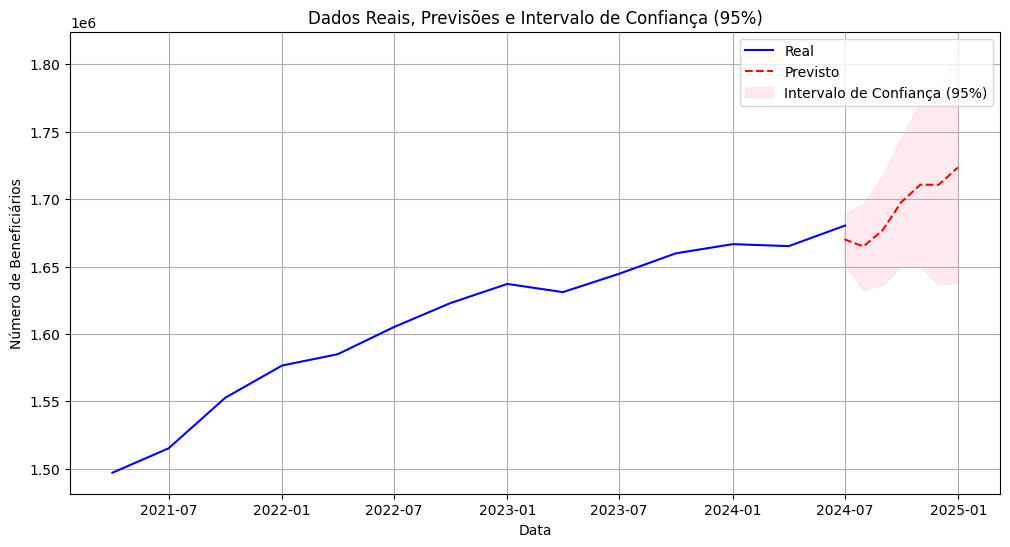

In [ ]:
# Ajuste o período de previsão
forecast_dates = pd.date_range(start='2024-6-30', end='2024-12-31', freq='M')

# Fazer previsões para o período correto e obter intervalos de confiança
forecast = model_fit.get_forecast(steps=len(forecast_dates))

# Previsão média
forecast_mean = forecast.predicted_mean

# Intervalo de confiança (95%)
forecast_conf_int = forecast.conf_int()

# Criando o DataFrame para previsões
forecast_df = pd.DataFrame(data=forecast_mean.values, index=forecast_dates, columns=['Predito'])

# Plotando a série real e as previsões com intervalo de confiança
plt.figure(figsize=(12, 6))

# Plotando os dados reais
plt.plot(df_total.index, df_total.values, label='Real', color='blue')

# Plotando as previsões
plt.plot(forecast_df.index, forecast_df['Predito'], label='Previsto', color='red', linestyle='--')

# Plotando o intervalo de confiança
plt.fill_between(forecast_dates, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3, label='Intervalo de Confiança (95%)')

# Configurações do gráfico
plt.title('Dados Reais, Previsões e Intervalo de Confiança (95%)')
plt.xlabel('Data')
plt.ylabel('Número de Beneficiários')
plt.legend()
plt.grid(True)

# Exibir o gráfico
plt.show()


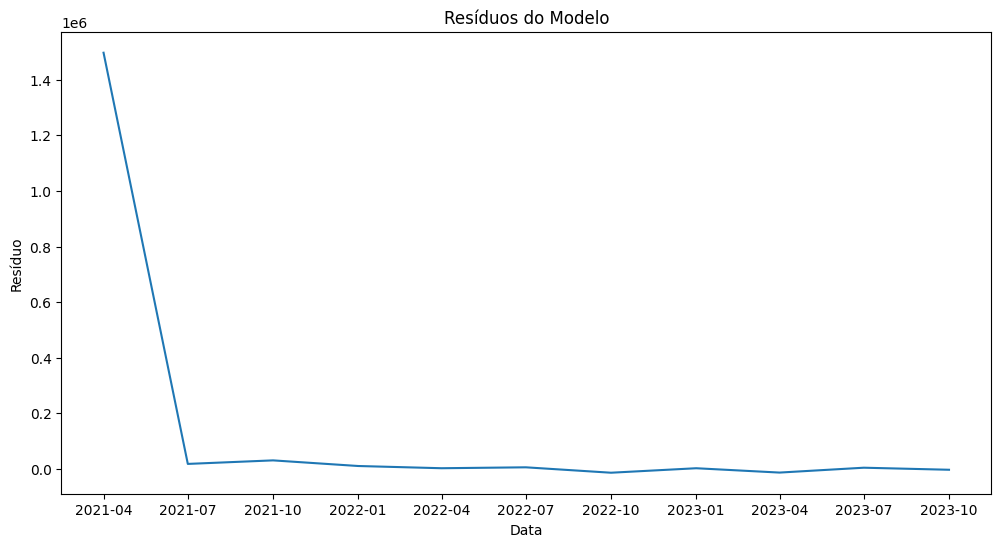

count    1.100000e+01
mean     1.402802e+05
std      4.501584e+05
min     -1.351261e+04
25%     -1.217629e+02
50%      4.514041e+03
75%      1.440945e+04
max      1.497018e+06
dtype: float64


In [ ]:
# Resíduos do modelo
residuals = model_fit.resid

# Plotando resíduos
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Resíduos do Modelo')
plt.xlabel('Data')
plt.ylabel('Resíduo')
plt.show()

# Verificando estatísticas dos resíduos
print(residuals.describe())


In [ ]:
#print(df_total)
# Exportando para CSV
#df_total.to_csv('dados_beneficiarios.csv')

#from google.colab import files
#files.download('dados_beneficiarios.csv')

In [ ]:
print(forecast_df)

                 Predito
2024-06-30  1.670160e+06
2024-07-31  1.664860e+06
2024-08-31  1.676874e+06
2024-09-30  1.697596e+06
2024-10-31  1.710610e+06
2024-11-30  1.710657e+06
2024-12-31  1.723443e+06


In [ ]:
import numpy as np

# Passo 1: Filtrar os dados pela última data real disponível
ultima_data_real = df['Data'].max()

# Filtrar os dados da última data real para todos os municípios
df_ultima_data = df[df['Data'] == ultima_data_real]

# Calcular o total de beneficiários na última data para todos os municípios
total_beneficiarios_ultima_data = df_ultima_data['Beneficiarios'].sum()

# Calcular a proporção de beneficiários para cada município na última data
df_ultima_data['Proporcao'] = df_ultima_data['Beneficiarios'] / total_beneficiarios_ultima_data

# Passo 2: Criar uma coluna de datas no forecast_df a partir do índice
forecast_df['Data'] = forecast_df.index

# Passo 3: Aplicar a proporção na previsão total de beneficiários para distribuir pelos municípios
df_previsao_municipios = pd.DataFrame()

# Para cada município, calcular a previsão proporcional com base na última data real
for idx, row in df_ultima_data.iterrows():
    municipio = row['Municípios']
    proporcao = row['Proporcao']

    # Distribuir a previsão total (forecast_df['Predito']) para este município usando a proporção
    previsao_municipio = forecast_df['Predito'] * proporcao

    # Criar um DataFrame para as previsões deste município
    df_previsao_municipio = pd.DataFrame({
        'Data': forecast_df['Data'],
        'id-municipio': row['id-municipio'],
        'Municípios': municipio,
        'Beneficiarios_Previstos': previsao_municipio
    })

    # Concatenar ao DataFrame final
    df_previsao_municipios = pd.concat([df_previsao_municipios, df_previsao_municipio])

# Passo 4: Unir os dados reais com as previsões para visualização
df_completo = pd.concat([df, df_previsao_municipios])

# Verificar se há valores NaN e substituí-los por 0 ou outro valor apropriado
df_completo['Beneficiarios_Previstos'] = df_completo['Beneficiarios_Previstos'].replace([np.inf, -np.inf], np.nan)
df_completo['Beneficiarios_Previstos'] = df_completo['Beneficiarios_Previstos'].fillna(0)

# Verificar se há valores NaN e substituí-los por 0 ou outro valor apropriado
df_completo['Beneficiarios'] = df_completo['Beneficiarios'].replace([np.inf, -np.inf], np.nan)
df_completo['Beneficiarios'] = df_completo['Beneficiarios'].fillna(0)

# Aplicar o arredondamento para cima em todos os valores da coluna
df_completo['Beneficiarios_Previstos'] = np.ceil(df_completo['Beneficiarios_Previstos'].astype(float)).astype(int)
df_completo['Beneficiarios'] = np.ceil(df_completo['Beneficiarios'].astype(float)).astype(int)


# Exportando o DataFrame final para CSV (para ser usado no Power BI ou Looker Studio)
df_completo.to_csv('previsao_beneficiarios_municipios.csv', index=False)


<ipython-input-22-6c8bbc60c8de>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ultima_data['Proporcao'] = df_ultima_data['Beneficiarios'] / total_beneficiarios_ultima_data


In [ ]:
print(df_completo)

                          Data  Beneficiarios id-municipio        Municípios  \
0                   2024-06-01            472       420005     Abdon Batista   
1                   2024-06-01           2063       420010      Abelardo Luz   
2                   2024-06-01            484       420020        Agrolândia   
3                   2024-06-01            445       420030        Agronômica   
4                   2024-06-01           1039       420040         Água Doce   
...                        ...            ...          ...               ...   
2024-08-31 00:00:00 2024-08-31              0       422000  Balneário Rincão   
2024-09-30 00:00:00 2024-09-30              0       422000  Balneário Rincão   
2024-10-31 00:00:00 2024-10-31              0       422000  Balneário Rincão   
2024-11-30 00:00:00 2024-11-30              0       422000  Balneário Rincão   
2024-12-31 00:00:00 2024-12-31              0       422000  Balneário Rincão   

                     Beneficiarios_Prev

In [ ]:
from google.colab import files
files.download('previsao_beneficiarios_municipios.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Verificar a soma das previsões para cada data
soma_previsao_municipios = df_previsao_municipios.groupby('Data')['Beneficiarios_Previstos'].sum()

# Comparar com a previsão original (forecast_df['Predito'])
comparacao = pd.DataFrame({
    'Predito_Total': forecast_df['Predito'],
    'Soma_Previsao_Municipios': soma_previsao_municipios
})

# Exibir a comparação
print(comparacao)

# Verificar se as diferenças entre as somas são pequenas
diferenca = comparacao['Predito_Total'] - comparacao['Soma_Previsao_Municipios']
print(f'Diferença máxima: {diferenca.max()}')
print(f'Diferença mínima: {diferenca.min()}')


            Predito_Total  Soma_Previsao_Municipios
2024-06-30   1.670160e+06              1.670160e+06
2024-07-31   1.664860e+06              1.664860e+06
2024-08-31   1.676874e+06              1.676874e+06
2024-09-30   1.697596e+06              1.697596e+06
2024-10-31   1.710610e+06              1.710610e+06
2024-11-30   1.710657e+06              1.710657e+06
2024-12-31   1.723443e+06              1.723443e+06
Diferença máxima: 0.0
Diferença mínima: 0.0


In [ ]:
# Verificar a soma das proporções para a última data real
soma_proporcoes = df_ultima_data['Proporcao'].sum()
print(f'Soma das proporções (deve ser 1): {soma_proporcoes}')


Soma das proporções (deve ser 1): 1.0
